In [1]:
import csv

dataset = [ [], [], [], [], [] ]
measurements = [ "sepal length", "sepal width", "petal length", "petal width" ]
with open("iris.csv") as f:
    for row in csv.reader(f):
        if len(row) == 5: # only do this if the number of columns is 5, as expected
            for i in range(4): # the 4 measurements should be converted to float
                dataset[i].append(float(row[i]))
            # position 4 is the iris type, which is to be kept as a string
            dataset[4].append(row[4])

In [10]:
def mean(x):
    return sum(x) / len(x)
x = [ 5, 3, 15, 4, 1 ]
u = mean(x)
u
diff = [ (x_i - u) ** 2 for x_i in x ]
diff
print(mean(diff)**0.5)
def std(x):
    u = mean(x)
    return (mean([ (x_i - u) ** 2 for x_i in x ])) ** 0.5
std(x)
for i, m in enumerate(measurements):
    print(f"{m} mean {mean(dataset[i]):.4f} std {std(dataset[i]):.4f}")

4.882622246293481
sepal length mean 5.8433 std 0.8253
sepal width mean 3.0540 std 0.4321
petal length mean 3.7587 std 1.7585
petal width mean 1.1987 std 0.7606


In [14]:
iris_types = [ 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ]
iris_types = set(dataset[4])
iris_types

for i, m in enumerate(measurements):
    print(m)
    for iris_type in iris_types:
        # For each measurement and for each iris type, build a list of values
        values = [ v for v,t in zip(dataset[i], dataset[4]) if t == iris_type ]
        print(f"{iris_type} {mean(values):.4f} {std(values):.4f}")
    print()

sepal length
Iris-virginica 6.5880 0.6295
Iris-setosa 5.0060 0.3489
Iris-versicolor 5.9360 0.5110

sepal width
Iris-virginica 2.9740 0.3193
Iris-setosa 3.4180 0.3772
Iris-versicolor 2.7700 0.3106

petal length
Iris-virginica 5.5520 0.5463
Iris-setosa 1.4640 0.1718
Iris-versicolor 4.2600 0.4652

petal width
Iris-virginica 2.0260 0.2719
Iris-setosa 0.2440 0.1061
Iris-versicolor 1.3260 0.1958



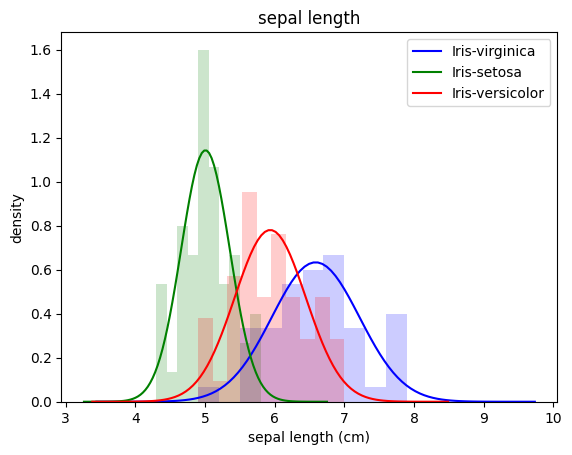

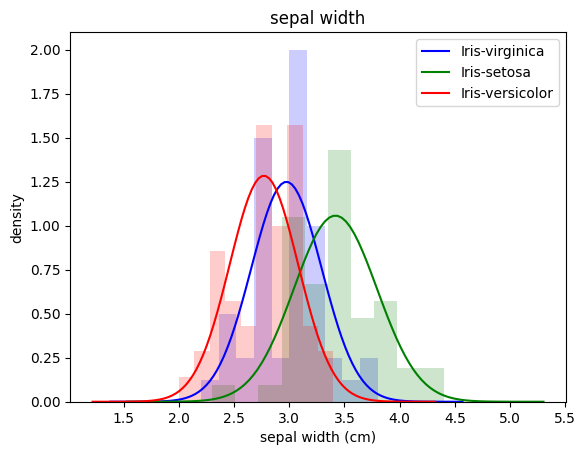

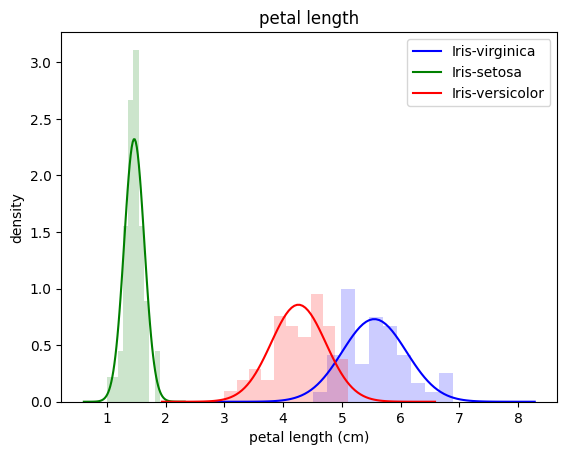

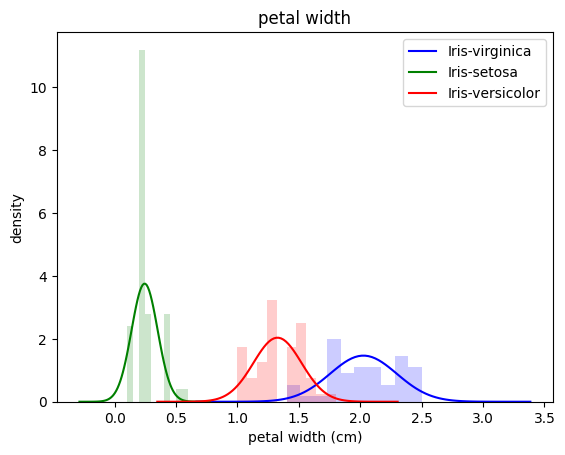

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
import numpy as np

colors = ['b','g','r']
for i, m in enumerate(measurements):
    plt.figure()
    plt.title(m)
    for iris_type, color in zip(iris_types, colors):
        # For each measurement and for each type of iris, build a list of values
        values = [ v for v,t in zip(dataset[i], dataset[4]) if t == iris_type ]
        plt.hist(values, density=True, alpha=0.2, color=color)
        u = mean(values)
        s = std(values)
        x = np.linspace(u-5*s, u+5*s, 100)
        plt.plot(x, norm(u,s).pdf(x), label=iris_type, color=color)
        plt.xlabel(f"{m} (cm)")
        plt.ylabel("density")
    plt.legend()